# **감정 분류 (Emotion Classification)**

## 1.Datasets 로드하고 확인하기

- You can download FER(Face Emotions Recognition) Datasets from https://www.kaggle.com/datasets/msambare/fer2013

### 1-1. 데이터셋 다운로드하기

### 방법1) 구글 드라이브에 데이터셋 압축파일로 업로드 후 공유링크에서 다운로드하기

In [1]:
# 데이터 다운로드하기 - 'fer2013.zip'

!gdown 1IqZeiM2k_Hyx5VGWEX3DfZKJLKJVd7D7    # ... 코드입력

Downloading...
From (original): https://drive.google.com/uc?id=1IqZeiM2k_Hyx5VGWEX3DfZKJLKJVd7D7
From (redirected): https://drive.google.com/uc?id=1IqZeiM2k_Hyx5VGWEX3DfZKJLKJVd7D7&confirm=t&uuid=e944fb7d-3547-46f7-9abb-4d283507c655
To: /content/archive.zip
100% 63.3M/63.3M [00:01<00:00, 62.2MB/s]


In [2]:
# 다운 받은 압축파일 압축해제하기 : fer2013 디렉토리 하위에 압축 풀기
!unzip  archive.zip -d ./fer2013    # ... 코드입력

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: ./fer2013/train/sad/Training_65242339.jpg  
  inflating: ./fer2013/train/sad/Training_65267116.jpg  
  inflating: ./fer2013/train/sad/Training_65275626.jpg  
  inflating: ./fer2013/train/sad/Training_6529266.jpg  
  inflating: ./fer2013/train/sad/Training_65329617.jpg  
  inflating: ./fer2013/train/sad/Training_65338712.jpg  
  inflating: ./fer2013/train/sad/Training_65338797.jpg  
  inflating: ./fer2013/train/sad/Training_65387162.jpg  
  inflating: ./fer2013/train/sad/Training_65404494.jpg  
  inflating: ./fer2013/train/sad/Training_65426218.jpg  
  inflating: ./fer2013/train/sad/Training_65430136.jpg  
  inflating: ./fer2013/train/sad/Training_65437377.jpg  
  inflating: ./fer2013/train/sad/Training_6545735.jpg  
  inflating: ./fer2013/train/sad/Training_65463385.jpg  
  inflating: ./fer2013/train/sad/Training_65473985.jpg  
  inflating: ./fer2013/train/sad/Training_65502829.jpg  
  inflating: ./fer2013/train/sad/Training_65505359.jpg

### 방법2) 구글 드라이브 마운트하여 가져온 후 압축파일 해제하기

In [3]:
from google.colab import drive       # ... 코드입력
drive.mount('/content/drive')        # ... 코드입력

MessageError: Error: credential propagation was unsuccessful

In [ ]:
import zipfile

# zipfile.ZipFile() 사용하여 fer2013 하위폴더에 압축풀기
path = /content/drive/MyDrive/Colab Notebooks/2024 Intel Edge AI SW academy/0508-09    # ... 코드입력
zip_object = os.path.join(path, "archive.zip")    # ... 코드입력

# fer2013 하위폴더에 압축풀기
...    # ... 코드입력
# close()하기
...    # ... 코드입력

## 방법3 ) Kaggele 사이트에서 직접 다운로드하기

In [ ]:
# colab - linux
!pip install kaggle

In [ ]:
mkdir ~/.kaggle

- kaggle 사이트의 My Profile > settings > API 에서 'create New Token' => 'kaggle.son' 다운로드해서 colab으로 upload 하기

In [ ]:
! cp kaggle.json ~/.kaggle/

- https://www.kaggle.com/datasets/msambare/fer2013 의 우상단 설정에서 'Copy Api command' 클릭하기

In [ ]:
# 데이터셋 다운로드 kaggle의 api command 사용하여 다운로드하기
! kaggle datasets download -d msambare/fer2013

In [ ]:
# 압축풀기
...    # ... 코드입력

- 이미지 확인해보기

In [ ]:
import tensorflow as tf
import numpy as np

tf.keras.preprocessing.image.load_img('/content/fer-2013/train/happy/Training_10019449.jpg')

In [ ]:
tf.keras.preprocessing.image.load_img('/content/fer-2013/train/surprise/Training_10013223.jpg')

In [ ]:
img = tf.keras.preprocessing.image.load_img('/content/fer-2013/train/neutral/Training_10002154.jpg')
np.array(img).shape

In [ ]:
np.array(img).shape[1], np.array(img).shape[0]

## 2. 학습/테스트 데이터셋 생성하기

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(rotation_range=10,  # 이미지를 무작위로 회전시킬 최대 각도
                                     zoom_range=0.2,  # 이미지를 무작위로 확대/축소할 범위를 지정,1 - 0.2 = 0.8배에서 1 + 0.2 = 1.2배 사이의 무작위 스케일로 이미지를 확대 또는 축소
                                     horizontal_flip=True,  # 이미지를 수평 방향(좌우)으로 무작위로 뒤집기
                                     rescale=1/255)  # 이미지의 픽셀 값을 0에서 255의 범위에서 0에서 1의 범위로 정규화

- `ImageDataGenerator()`는 실시간 데이터 증대를 통해 텐서 이미지 데이터 배치를 생성합니다. (참고: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)
  - `rotation_range`, `zoom_range`, `horizontal_flip`은 데이터 증대를 위한 매개변수입니다.
  - `rescale`은 정규화를 위한 매개변수입니다.


In [ ]:
train_dataset = train_generator.flow_from_directory(directory='/content/fer2013/train',
                                                    target_size=(48, 48),  # 로드된 이미지의 크기를 조정할 대상의 크기, defaults to (256, 256)
                                                    class_mode='categorical', # one-hot 인코딩된 레이블을 반환, 다중 클래스 분류 문제 적합
                                                    batch_size=16,  # 한 번에 네트워크로 전달될 이미지의 수 (default: 32)
                                                    shuffle=True,  # 에포크마다 데이터를 섞을지 여부를 결정 (default: True) If set to False, sorts the data in alphanumeric order
                                                    seed=10)

-  ImageDataGenerator를 활용하여 디렉토리로부터 훈련 데이터를 로드하고, 데이터 증강을 적용한 데이터셋을 생성하는 과정 설정
- flow_from_directory 메서드는 지정된 디렉토리 구조 내의 이미지 파일들을 읽어서, 데이터 증강을 적용한 후 훈련 데이터로 사용할 수 있는 배치(batch) 형태로 제공

In [ ]:
dir(train_dataset)

In [ ]:
train_dataset.classes

In [ ]:
train_dataset.class_indices

In [ ]:
import numpy as np

np.unique(train_dataset.classes, return_counts=True)

- Disgust에 해당하는 436개의 이미지는 상대적으로 작습니다.

In [ ]:
test_generator = ImageDataGenerator(rescale=1/255)

test_dataset = test_generator.flow_from_directory(directory='/content/fer2013/test',
                                                  target_size=(48, 48),
                                                  class_mode='categorical',
                                                  batch_size=1,
                                                  shuffle=False,
                                                  seed=10)

- 테스트 과정에서 데이터의 원본 상태를 유지하면서 모델 평가의 일관성과 신뢰성을 보장하기위해 증강 적용하지 않
- `batch_size=1`인 이유는 하나씩 테스트해 볼 예정이기 때문입니다.

## 3. 모델 구성하기 (Convolutional Neural Network,CNN)

다음 모델 구성을 보고 코드를 작성하세요
```
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 48, 48, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_2 (Bat  (None, 24, 24, 64)        256       
 chNormalization)                                                
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 batch_normalization_3 (Bat  (None, 24, 24, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                
 dense (Dense)               (None, 128)               1179776   
                                                                 
 batch_normalization_4 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_5 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 455       
 ```                                                                

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization

num_classes = 7                        # len(train_dataset.class_indices)
num_detectors = 32
width, height = 48, 48                 #  np.array(img).shape[1], np.array(img).shape[0]

model = Sequential()

model.add(Conv2D(filters=num_detectors, kernel_size=3, activation='relu', padding='same', input_shape=(width, height, 3)))
model.add(BatchNormalization())
model.add(Conv2D(filters=num_detectors, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=num_detectors*2, kernel_size=3, activation='relu', padding='same', input_shape=(width, height, 3)))
model.add(BatchNormalization())
model.add(Conv2D(filters=num_detectors*2, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(2*2*num_detectors, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(2*num_detectors))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(num_classes))

In [ ]:
print(model.summary())

In [ ]:
# 모델 컴파일하기 : optimizer - 'Adam'
import tensorflow as tf

model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

## 4. 모델 학습하기

In [14]:
epochs = 20

model.fit(train_dataset, epochs=epochs)

Epoch 1/20
1795/1795 [==============================] - 76s 30ms/step - loss: 6.5341 - accuracy: 0.1078
Epoch 2/20
1795/1795 [==============================] - 56s 31ms/step - loss: 7.7823 - accuracy: 0.1298
Epoch 3/20
1795/1795 [==============================] - 53s 29ms/step - loss: 7.9367 - accuracy: 0.1257
Epoch 4/20
1795/1795 [==============================] - 51s 29ms/step - loss: 7.6412 - accuracy: 0.1234
Epoch 5/20
1795/1795 [==============================] - 51s 28ms/step - loss: 8.1583 - accuracy: 0.1308
Epoch 6/20
1795/1795 [==============================] - 51s 28ms/step - loss: 7.8152 - accuracy: 0.1305
Epoch 7/20
1795/1795 [==============================] - 53s 29ms/step - loss: 7.9514 - accuracy: 0.1343
Epoch 8/20
1795/1795 [==============================] - 51s 29ms/step - loss: 7.2889 - accuracy: 0.1365
Epoch 9/20
1795/1795 [==============================] - 49s 27ms/step - loss: 8.2670 - accuracy: 0.1211
Epoch 10/20
1795/1795 [==============================] - 50s 28m

## 5. 모델 평가하기

In [15]:
score = model.evaluate(test_dataset)    # ... 코드입력

print(f'accuracy : {round(score[1],2)}, loss : {round(score[0],2)}')

7178/7178 [==============================] - 26s 4ms/step - loss: 9.9722 - accuracy: 0.1436
accuracy : 0.14, loss : 9.97


In [ ]:
preds = model.predict(test_dataset)    # ... 코드입력
preds

In [17]:
preds = np.argmax(preds, axis=1)
preds

array([4, 4, 3, ..., 1, 4, 1])

In [ ]:
test_dataset.classes

In [19]:
import pandas as pd

df_result = pd.DataFrame(columns=['Actual', 'Predicted'])
df_result['Actual'] = test_dataset.classes
df_result['Predicted'] = preds
df_result

,Actual,Predicted
0,0,4
1,0,4
2,0,3
3,0,3
4,0,4
...,...,...
7173,6,1
7174,6,1
7175,6,1
7176,6,4


In [20]:
from sklearn.metrics import accuracy_score

accuracy_score(test_dataset.classes, preds)

0.14363332404569518

In [21]:
test_dataset.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

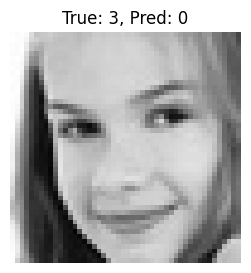

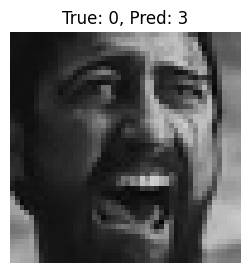

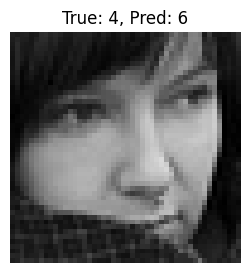

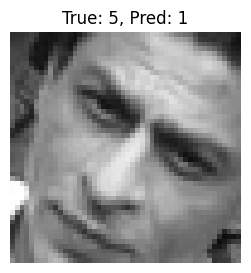

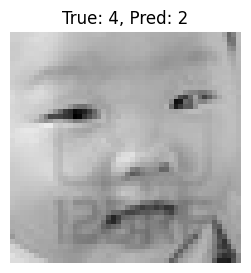

In [22]:
# 시각화할 이미지 개수
import matplotlib.pyplot as plt
num_images = 5
samples_to_display = np.random.choice(len(test_dataset), num_images, replace=False)

# 테스트 데이터 중 일부 이미지 시각화
for i, idx in enumerate(samples_to_display):
    img, label = test_dataset[idx]  # 이미지와 레이블을 가져옵니다
    img = img[0]  # 배치 차원 제거
    true_label = test_dataset.classes[idx]
    pred_label = preds[idx]
    plt.figure(figsize=(5, 3))
    plt.imshow(img)
    plt.title(f"True: {true_label}, Pred: {pred_label}")
    plt.axis('off')
    plt.show()

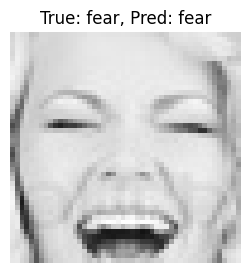

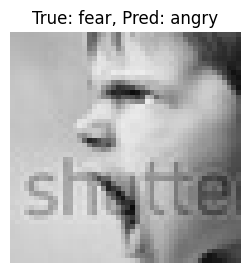

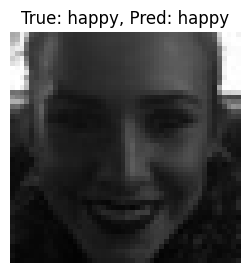

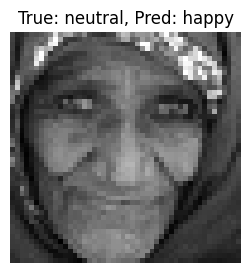

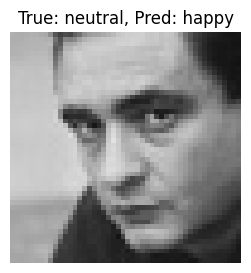

In [23]:
# 시각화할 이미지 개수
num_images = 5
#samples_to_display = np.random.choice(len(test_dataset), num_images, replace=False)
samples_to_display = np.random.choice(test_dataset.n, num_images, replace=False)

# # 테스트 데이터 중 일부 이미지 시각화
# for i, idx in enumerate(samples_to_display):
#     img = test_dataset[idx].squeeze()  # 차원 축소
#     true_label = y_test_classes[idx]
#     pred_label = preds_classes[idx]
#     plt.figure(figsize=(5, 3))
#     plt.imshow(img, cmap='gray')
#     plt.title(f"True: {test_dataset.class_indices[true_label]}, Pred: {test_dataset.class_indices[pred_label]}")
#     plt.axis('off')
#     plt.show()

# 테스트 데이터 중 일부 이미지 시각화
for i, idx in enumerate(samples_to_display):
    # 데이터셋에서 이미지를 추출하려면, idx를 배치 인덱스와 위치 인덱스로 변환해야 합니다.
    batch_index = idx // test_dataset.batch_size
    img_index = idx % test_dataset.batch_size
    # 데이터 제너레이터에서 배치를 로드합니다.
    img_batch, label_batch = test_dataset[batch_index]
    img = img_batch[img_index].squeeze()  # 차원 축소
    true_label = np.argmax(label_batch[img_index])
    pred_label = preds[idx]

    plt.figure(figsize=(5, 3))
    plt.imshow(img, cmap='gray')
    # 클래스 인덱스를 클래스 이름으로 변환하여 표시합니다.
    plt.title(f"True: {list(test_dataset.class_indices.keys())[true_label]}, Pred: {list(test_dataset.class_indices.keys())[pred_label]}")
    plt.axis('off')
    plt.show()

## 6. 모델 저장하고 로드하기

- 모델/가중치를 저장하고 로드하려면 아래 코드의 주석 처리를 취소하고 사용하 세요.

In [24]:
from keras.models import save_model

# 모델 전체를 'model.h5' 파일로 저장
save_model(model, 'model.h5')

# 모델의 구조를 JSON 문자열로 반환-모델을 구성하는 각 레이어의 구성과 설정이 포함
with open('trained_model.json', 'w') as trained_model_json:
    trained_model_json.write(model.to_json())

# 모델 구조 로드하기
with open('trained_model.json', 'r') as trained_model_json:
    trained_model_json = trained_model_json.read()

# 모델 가중치 저장하기
save_model(model, '/content/weights_emotions.hdf5')

# Load the trained model & weights
model = tf.keras.models.model_from_json(trained_model_json)
model.load_weights('/content/weights_emotions.hdf5')

<ipython-input-24-277f41891192>:4: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, 'model.h5')
<ipython-input-24-277f41891192>:15: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, '/content/weights_emotions.hdf5')


## 7. 실제 이미지로 분류하기 - 사전 학습된 모델 사용

In [25]:
# 테스트할 이미지 파일 다운로드하기
!gdown 1YT-S4qnWprl2Nd6GdDsfI5S-Fot9jEXl

Downloading...
From: https://drive.google.com/uc?id=1YT-S4qnWprl2Nd6GdDsfI5S-Fot9jEXl
To: /content/happy_face.jpg
100% 138k/138k [00:00<00:00, 97.8MB/s]


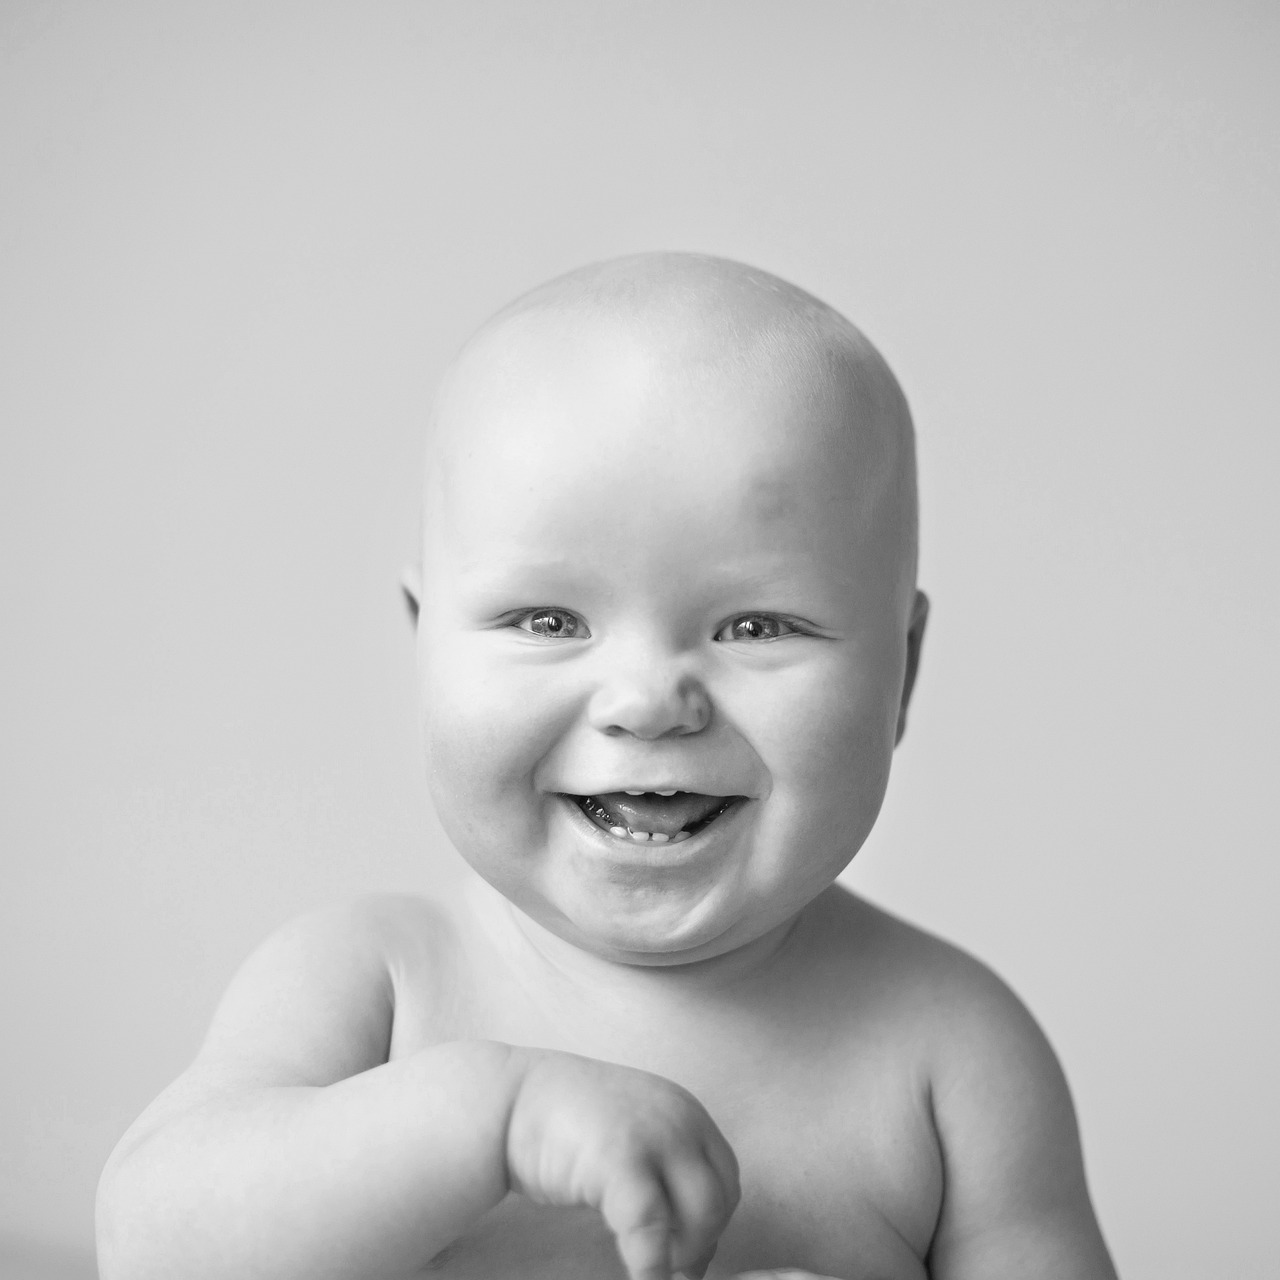

In [26]:
import cv2
from google.colab.patches import cv2_imshow

image = cv2.imread('happy_face.jpg')
cv2_imshow(image)

### **`mmod_human_face_detector.dat`** : Dlib 라이브러리에서 사용되는, 얼굴 인식을 위한 딥러닝 모델 파일
- Dlib은 컴퓨터 비전과 머신 러닝을 위한 C++ 라이브러리이며, Python 바인딩을 통해 Python에서도 사용할 수 있습니다.
- `mmod_human_face_detector.dat` 파일은 특히 Dlib의 최대 마진 객체 감지(Max-Margin Object Detection, MMOD) 알고리즘을 사용한 인간 얼굴 감지 모델을 포함하고 있습니다.
- https://github.com/justadudewhohacks/face-recognition.js-models/blob/master/models/mmod_human_face_detector.dat

- MMOD는 딥러닝 기반의 객체 감지 알고리즘 중 하나로, 각 객체에 대해 손실 함수를 최소화하는 방식으로 동작합니다. 이 알고리즘은 특히 작은 데이터 세트에서도 높은 성능을 낼 수 있도록 설계되었으며, 객체 감지 모델을 학습시킬 때 사용됩니다. MMOD는 객체 감지 문제를 학습 문제로 변환하여, 특정 객체(여기서는 인간의 얼굴)를 이미지에서 정확하게 찾아내도록 합니다.

`mmod_human_face_detector.dat` 파일은 Dlib 라이브러리를 사용하여 얼굴 감지 기능을 구현할 때 필요한 사전 학습된 모델이며, 특정 어플리케이션에 적용하여 얼굴 감지 기능을 신속하게 구현할 수 있도록 해줍니다.

In [27]:
# 사전 훈련된 모델 다운로드하기 - mmod_human_face_detector.dat
!gdown 1nRnLt6Y2p85sudWohdGYPsLWHa6vryF9

Downloading...
From: https://drive.google.com/uc?id=1nRnLt6Y2p85sudWohdGYPsLWHa6vryF9
To: /content/mmod_human_face_detector.dat
100% 730k/730k [00:00<00:00, 93.9MB/s]


In [28]:
import dlib
face_detector = dlib.cnn_face_detection_model_v1('mmod_human_face_detector.dat')

face_detection = face_detector(image, 1)
face_detection

mmod_rectangles[[(426, 491) (849, 913)]]

In [ ]:
left, top, right, bottom = face_detection[0].rect.left(), face_detection[0].rect.top(), face_detection[0].rect.right(), face_detection[0].rect.bottom()

roi = image[top:bottom, left:right]

cv2_imshow(roi)

In [ ]:
roi.shape

In [ ]:
# Resize image - 학습데이터와 사이즈 맞추기
roi = cv2.resize(roi, (48, 48))

roi.shape

(48, 48, 3)

In [32]:
# Normalize
roi = roi / 255

In [33]:
# CNN 모델은 4차원 배열로 변환하여 모델에 입력해야하므로 차원 변경
roi = np.expand_dims(roi, axis=0)   # axis=0은 배열의 가장 앞에 차원을 추가
roi.shape

(1, 48, 48, 3)

In [34]:
pred_probability = model.predict(roi)
pred_probability

1/1 [==============================] - 0s 173ms/step


array([[  7.768589  , -12.977239  ,   0.13897868,   9.286182  ,
          1.3416178 ,   3.5770187 ,  -9.548366  ]], dtype=float32)

In [ ]:
pred = np.argmax(pred_probability)
pred

3

# **이미지 증강방식 사용 안하는 방식**

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt

# 데이터셋 디렉토리 경로 설정
dataset_directory = '/content/fer-2013'

# 클래스 이름 및 데이터 로딩
class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
image_data = []
labels = []

for class_name in class_names:
    class_folder = os.path.join(dataset_directory, 'train', class_name)
    for image_name in os.listdir(class_folder):
        image_path = os.path.join(class_folder, image_name)
        image = cv2.imread(image_path)  # 그레이스케일로 읽기
        image = cv2.resize(image, (48, 48))  # 이미지 크기 조정
        image_data.append(image)
        labels.append(class_names.index(class_name))

# 데이터를 NumPy 배열로 변환 및 레이블 One-Hot 인코딩
image_data = np.array(image_data)
image_data = np.expand_dims(image_data, axis=-1)  # Conv2D에 맞게 차원 확장
labels = to_categorical(labels, num_classes=len(class_names))


In [ ]:
#모델 구성 및 컴파일 (이전과 동일)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization

num_classes = 7
num_detectors = 32
width, height = 48, 48

model2 = Sequential()

model2.add(Conv2D(filters=num_detectors, kernel_size=3, activation='relu', padding='same', input_shape=(width, height, 3)))
model2.add(BatchNormalization())
model2.add(Conv2D(filters=num_detectors, kernel_size=3, activation='relu', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.2))

model2.add(Conv2D(2*num_detectors, 3, activation='relu', padding='same'))
model2.add(BatchNormalization())
model2.add(Conv2D(2*num_detectors, 3, activation='relu', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.2))

model2.add(Conv2D(2*2*num_detectors, 3, activation='relu', padding='same'))
model2.add(BatchNormalization())
model2.add(Conv2D(2*2*num_detectors, 3, activation='relu', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.2))

model2.add(Flatten())

model2.add(Dense(2*2*num_detectors, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))

model2.add(Dense(2*num_detectors, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))

model2.add(Dense(num_classes, activation='softmax'))

model2.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

#모델 학습
epochs = 10
model2.fit(image_data, labels, epochs=epochs)

Epoch 1/10
898/898 [==============================] - 20s 15ms/step - loss: 1.7606 - accuracy: 0.3331
Epoch 2/10
898/898 [==============================] - 13s 15ms/step - loss: 1.3747 - accuracy: 0.4740
Epoch 3/10
898/898 [==============================] - 17s 19ms/step - loss: 1.2561 - accuracy: 0.5203
Epoch 4/10
898/898 [==============================] - 14s 16ms/step - loss: 1.1868 - accuracy: 0.5517
Epoch 5/10
898/898 [==============================] - 13s 15ms/step - loss: 1.1244 - accuracy: 0.5782
Epoch 6/10
898/898 [==============================] - 13s 15ms/step - loss: 1.0765 - accuracy: 0.5964
Epoch 7/10
898/898 [==============================] - 16s 17ms/step - loss: 1.0346 - accuracy: 0.6143
Epoch 8/10
898/898 [==============================] - 17s 19ms/step - loss: 0.9746 - accuracy: 0.6347
Epoch 9/10
898/898 [==============================] - 18s 20ms/step - loss: 0.9472 - accuracy: 0.6499
Epoch 10/10
898/898 [==============================] - 14s 16ms/step - loss: 0.873

In [ ]:
# 클래스 이름 및 데이터 로딩
class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
test_image_data = []
test_labels = []

for class_name in class_names:
    class_folder = os.path.join(dataset_directory, 'test', class_name)
    for image_name in os.listdir(class_folder):
        image_path = os.path.join(class_folder, image_name)
        image = cv2.imread(image_path)  # 그레이스케일로 읽기
        image = cv2.resize(image, (48, 48))  # 이미지 크기 조정
        test_image_data.append(image)
        test_labels.append(class_names.index(class_name))

# 데이터를 NumPy 배열로 변환 및 레이블 One-Hot 인코딩
test_image_data = np.array(test_image_data)
test_image_data = np.expand_dims(test_image_data, axis=-1)  # Conv2D에 맞게 차원 확장
test_labels = to_categorical(test_labels, num_classes=len(class_names))

225/225 [==============================] - 2s 8ms/step - loss: 1.0666 - accuracy: 0.6140
Test Loss: 1.0666348934173584, Test Accuracy: 0.6139593124389648
225/225 [==============================] - 1s 4ms/step


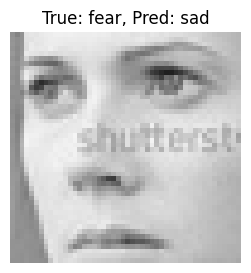

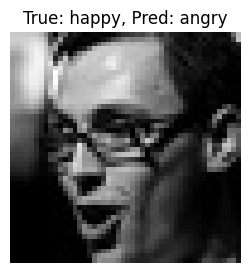

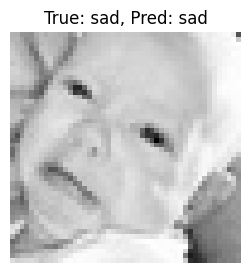

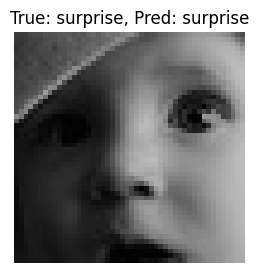

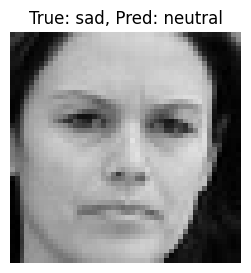

In [ ]:
#모델 평가
eval_result = model.evaluate(test_image_data, test_labels)
print("Test Loss: {}, Test Accuracy: {}".format(*eval_result))

#테스트 데이터 예측 및 시각화
preds = model.predict(test_image_data)
preds_classes = np.argmax(preds, axis=1)
y_test_classes = np.argmax(test_labels, axis=1)

# 시각화할 이미지 개수
num_images = 5
samples_to_display = np.random.choice(test_image_data.shape[0], num_images, replace=False)

# 테스트 데이터 중 일부 이미지 시각화
for i, idx in enumerate(samples_to_display):
    img = test_image_data[idx].squeeze()  # 차원 축소
    true_label = y_test_classes[idx]
    pred_label = preds_classes[idx]
    plt.figure(figsize=(5, 3))
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {class_names[true_label]}, Pred: {class_names[pred_label]}")
    plt.axis('off')
    plt.show()
